# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [12]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 1.0 MB/s eta 0:00:12
     --- ------------------------------------ 1.0/12.8 MB 1.6 MB/s eta 0:00:08
     ------ --------------------------------- 2.1/12.8 MB 2.4 MB/s eta 0:00:05
     --------- ------------------------------ 3.1/12.8 MB 3.0 MB/s eta 0:00:04
     ---------------- ----------------------- 5.2/12.8 MB 4.2 MB/s eta 0:00:02
     ---------------------- ----------------- 7.1/12.8 MB 4.8 MB/s eta 0:00:02
     ---------------------------- ----------- 9.2/12.8 MB 5.5 MB/s eta 0:00:01
     ----------

## Importing the necessary libraries

In [14]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [15]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [17]:
# Import the first file - True.csv
df_true= pd.read_csv('True.csv')

# Import the second file - Fake.csv
df_fake= pd.read_csv('Fake.csv')

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [20]:
# Inspect the DataFrame with True News to understand the given data
df_true.head(5)

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [21]:
# Inspect the DataFrame with Fake News to understand the given data
df_fake.head(5)

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former

In [22]:
# Print the column details for True News DataFrame
print(df_true.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB
None


In [23]:
# Print the column details for Fake News Dataframe
print(df_fake.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB
None


In [24]:
# Print the column names of both DataFrames
print('Column names for true and fake news are:') 
print(df_true.columns.tolist())

Column names for true and fake news are:
['title', 'text', 'date']


In [25]:
print(df_fake.columns.tolist())

['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [27]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true

df_true['news_label']=1

In [28]:
# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake

df_fake['news_label']=0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [30]:
# Combine the true and fake news DataFrames into a single DataFrame

df_news = pd.concat([df_true, df_fake], ignore_index= True)

In [31]:
# Display the first 5 rows of the combined DataFrame to verify the result
print(df_news.head(5))

                                                                   title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [33]:
# Check Presence of Null Values

print('Total null values are:')
print (df_news.isnull().sum())

Total null values are:
title         21
text          21
date          42
news_label     0
dtype: int64


In [34]:
# Handle Rows with Null Values
df_news= df_news.dropna()

### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [36]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space

df_news['news_text'] = df_news['title'].fillna('') + ' ' + df_news['text'].fillna('')

In [37]:
# Drop the irrelevant columns from the DataFrame as they are no longer needed

df_news = df_news.drop(columns=['title', 'text'])

In [38]:
# Display the first 5 rows of the updated DataFrame to check the result

print(df_news.head())

                 date  news_label  \
0  December 31, 2017            1   
1  December 29, 2017            1   
2  December 31, 2017            1   
3  December 30, 2017            1   
4  December 29, 2017            1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [42]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
# Add 'news_label' column to the new dataframe for topic identification
df_clean = df_news[['news_text', 'news_label']].copy()


In [43]:
print(df_clean.head())

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [45]:
# Write the function here to clean the text and remove all the unnecessary elements

import re
import string


def cleaning(text):
    #convert to lowercase
    text= text.lower()
    
    #remove text in square brackets
    text=re.sub(r'\[.*?\]', '', text)
    
    #remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    #remove words containing numbers
    text=re.sub(r'\w*\d\w*', '', text)
    return text



#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [47]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame
df_clean['clean_text']= df_clean['news_text'].apply(cleaning)

In [48]:
print(df_clean['clean_text'].head())

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            as us budget fight looms republicans flip their fiscal script washington reuters  the head of a conservative republican faction in the us congress who voted this month for a huge expansion of the national debt to pay for tax cuts called himself a fiscal conservative on sunday and urged budget restraint in  in keeping with a sharp pivot under way among republicans us representative mark meadows speaking on cbs face the nation drew a hard line on federal spending which law

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags

    

In [52]:
import os
from math import ceil

def spacy_lemmatize_nouns_pipe(texts, batch_size=100, n_process=1, show_progress=True):
    
    results = []
    it = nlp.pipe(texts, batch_size=batch_size, n_process=n_process)
    if show_progress:
        it = tqdm(it, total=len(texts))

    for doc in it:
        # keep only nouns (NN/NNS equivalent), alpha tokens, non-stop, lemmatized
        lemmas = [token.lemma_.lower()
                  for token in doc
                  if token.pos_ == "NOUN" and token.is_alpha and not token.is_stop]
        results.append(" ".join(lemmas))
    return results


texts = df_clean['clean_text'].astype(str).tolist()
lemmatized_list = spacy_lemmatize_nouns_pipe(texts, batch_size=100, n_process=1, show_progress=True)
df_clean['lemmatized_text'] = lemmatized_list

100%|████████████████████████████████████████████████████████████████████████████| 44898/44898 [32:13<00:00, 23.22it/s]


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [54]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame

#df_clean['lemmatized_text'] = df_clean['clean_text'].apply(spacy_lemmatize_nouns)

### Save the Cleaned data as a csv file (Recommended)

In [56]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [57]:
# Check the first few rows of the DataFrame
print(df_clean.head())

In [58]:
# Check the dimensions of the DataFrame
print(df_clean.shape)

(44898, 4)


In [59]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   news_text        44898 non-null  object
 1   news_label       44898 non-null  int64 
 2   clean_text       44898 non-null  object
 3   lemmatized_text  44878 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.4+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [61]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data

from sklearn.model_selection import train_test_split

X = df_clean['lemmatized_text']
y = df_clean['news_label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [65]:
df_clean['clean_text'] = df_clean['clean_text'].fillna('')
df_clean['lemmatized_text'] = df_clean['lemmatized_text'].fillna('')

In [66]:
# Add a new column to calculate the character length of cleaned news text
# Add a new column to calculate the character length of lemmatized news text with POS tags removed

df_clean['clean_text_length'] = df_clean['clean_text'].apply(len)
df_clean['lemmatized_text_length'] = df_clean['lemmatized_text'].apply(len)

##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [68]:
# Create a histogram plot to visualise character lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Add histogram for cleaned news text
sns.histplot(df_clean['clean_text_length'], bins=30, color='blue', label='Cleaned Text', kde=False, alpha=0.8)

# Add histogram for lemmatized news text with POS tags removed
sns.histplot(df_clean['lemmatized_text_length'], bins=30, color='orange', label='Lemmatized Text', kde=False, alpha=0.8)

<Axes: xlabel='clean_text_length', ylabel='Count'>

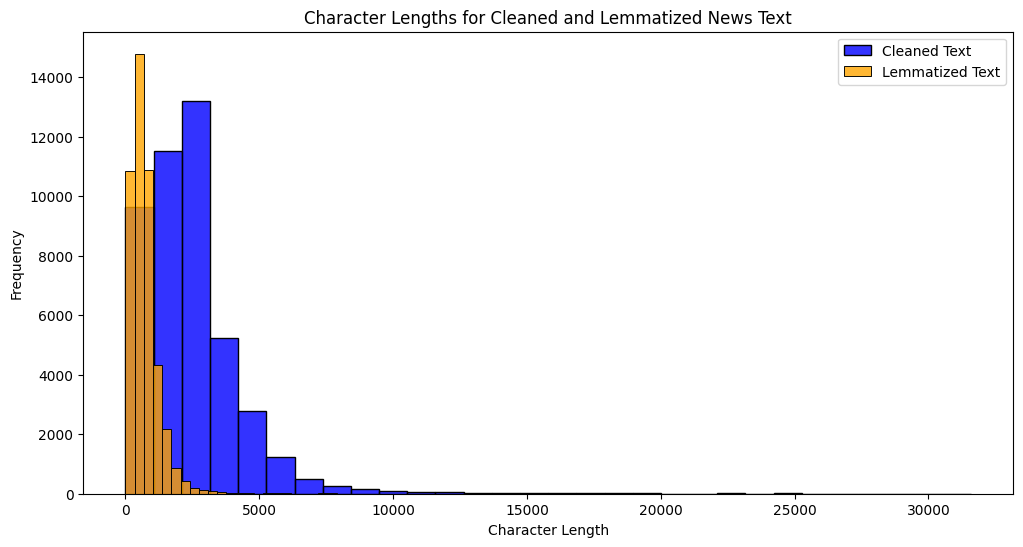

In [69]:
plt.title('Character Lengths for Cleaned and Lemmatized News Text')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

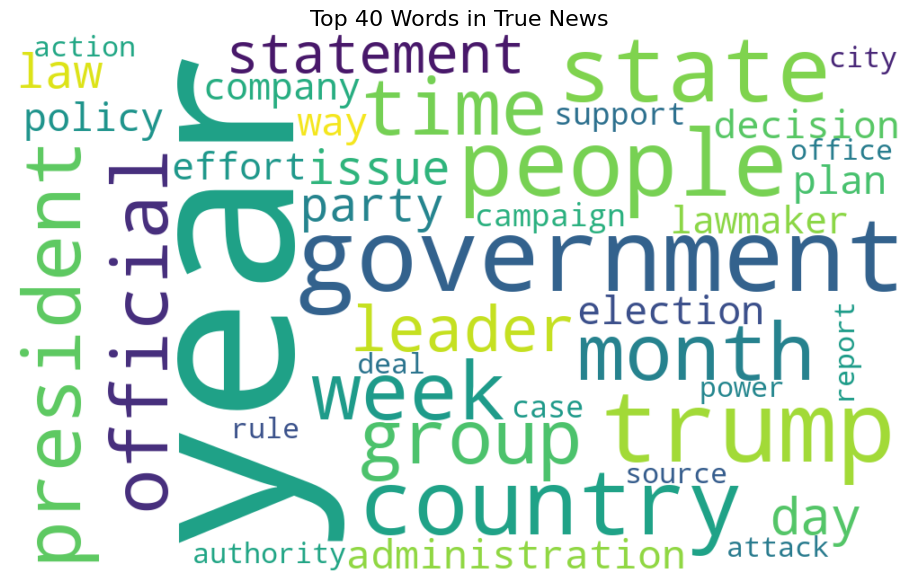

In [72]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values

# Generate word cloud for True News
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


train_df = pd.DataFrame({'lemmatized_text': X_train, 'news_label': y_train})

true_news = train_df[train_df['news_label'] == 1]['lemmatized_text']

true_text = true_news.astype(str).str.cat(sep=' ')

wordcloud = WordCloud(width=1000, height=600, max_words=40, background_color='white').generate(true_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News', fontsize=16)
plt.show()


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

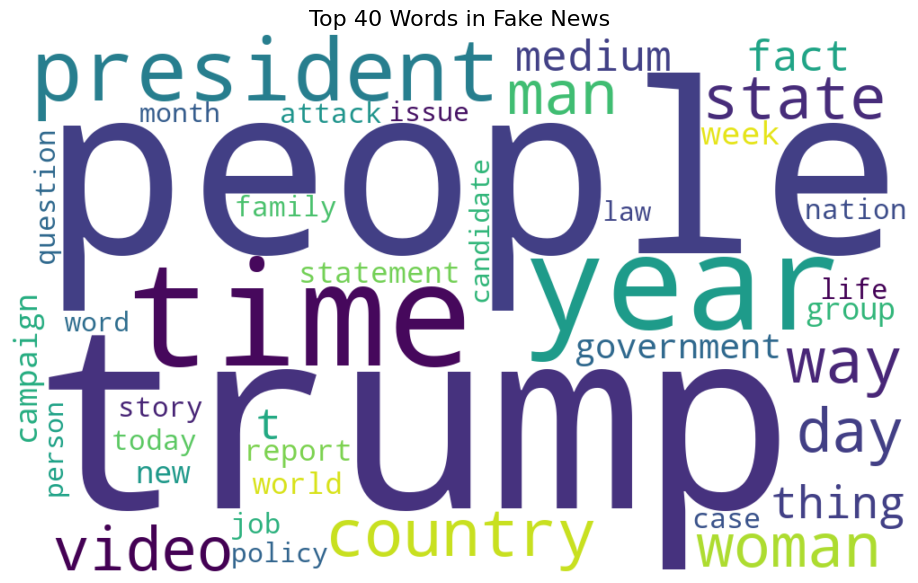

In [74]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values

# Generate word cloud for Fake News

fake_news = train_df[train_df['news_label'] == 0]['lemmatized_text']

fake_text = fake_news.astype(str).str.cat(sep=' ')

wordcloud = WordCloud(width=1000, height=600, max_words=40, background_color='white').generate(fake_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in Fake News', fontsize=16)
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [77]:
# Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def _sanitize(corpus):
    s = pd.Series(corpus)
    s = s.fillna('') \
         .map(lambda x: " ".join(x) if isinstance(x, (list, tuple)) else str(x)) \
         .str.strip()
    s = s.replace('', np.nan).dropna()
    return s.tolist()

def plot_ngrams(corpus, ngram_range=(1,1), top_n=20, title='', color='skyblue'):
    texts = _sanitize(corpus)
    if len(texts) == 0:
        print("No valid text documents to analyze.")
        return pd.DataFrame(columns=['n-gram','frequency'])
    
    vec = CountVectorizer(ngram_range=ngram_range)
    X = vec.fit_transform(texts)
    sums = np.asarray(X.sum(axis=0)).ravel()
    feats = vec.get_feature_names_out()
    top_idx = np.argsort(sums)[::-1][:top_n]
    
    df_ngram = pd.DataFrame({
        'n-gram': feats[top_idx],
        'frequency': sums[top_idx].astype(int)
    })
    
    plt.figure(figsize=(10, 6))
    plt.barh(df_ngram['n-gram'][::-1], df_ngram['frequency'][::-1], color=color)
    plt.title(title)
    plt.xlabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    return df_ngram


##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [79]:
# Handle NaN values in the text data
X_train = X_train.fillna('')

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

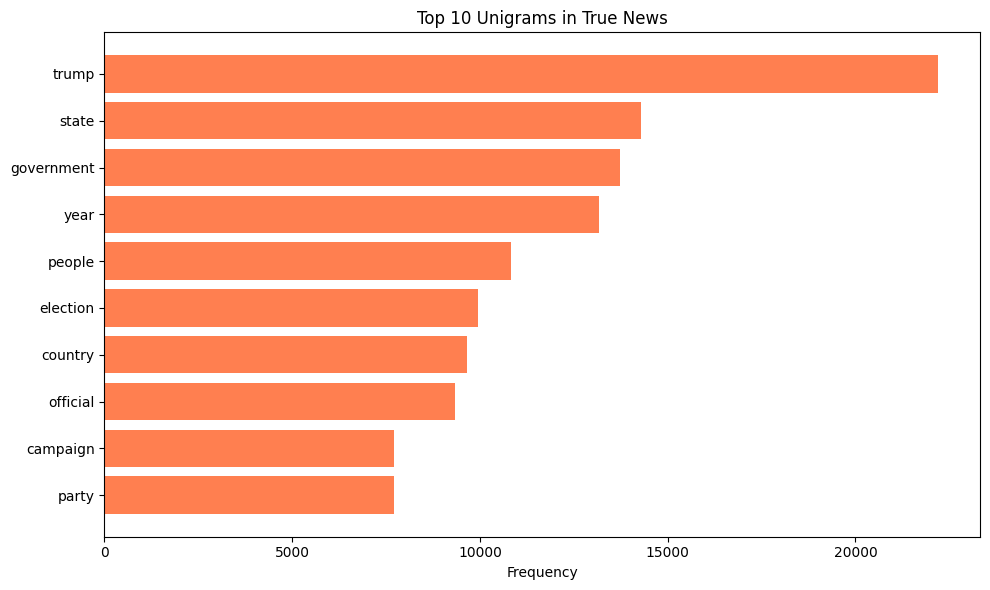

,n-gram,frequency
0,trump,22205
1,state,14293
2,government,13740
3,year,13168
4,people,10823
5,election,9949
6,country,9665
7,official,9338
8,campaign,7721
9,party,7706


In [82]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
plot_ngrams(true_news, (1,1), 10, "Top 10 Unigrams in True News", 'coral')

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



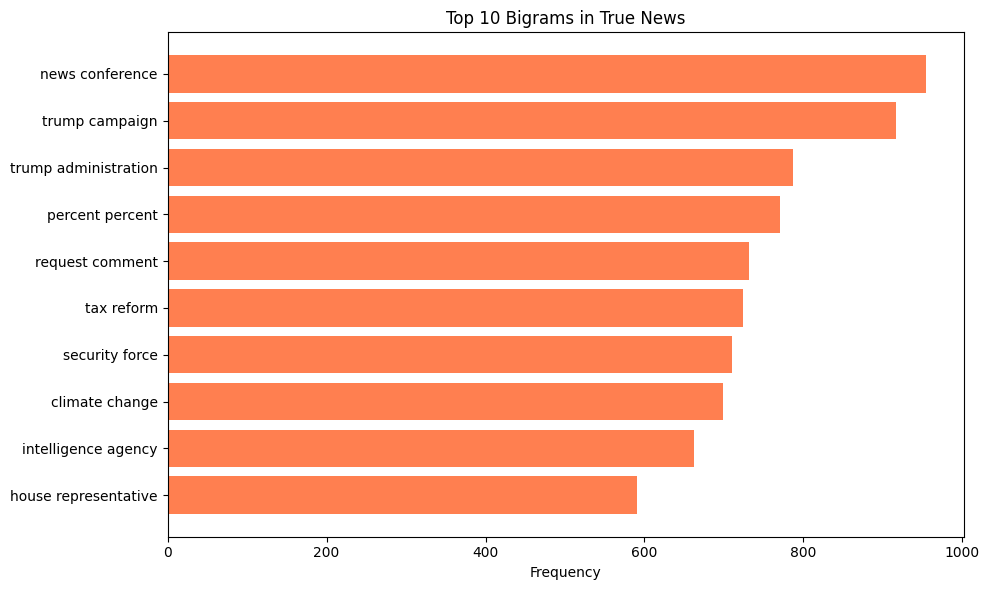

,n-gram,frequency
0,news conference,954
1,trump campaign,917
2,trump administration,787
3,percent percent,771
4,request comment,732
5,tax reform,724
6,security force,710
7,climate change,699
8,intelligence agency,662
9,house representative,590


In [84]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
plot_ngrams(true_news, (2,2), 10, "Top 10 Bigrams in True News", 'coral')

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



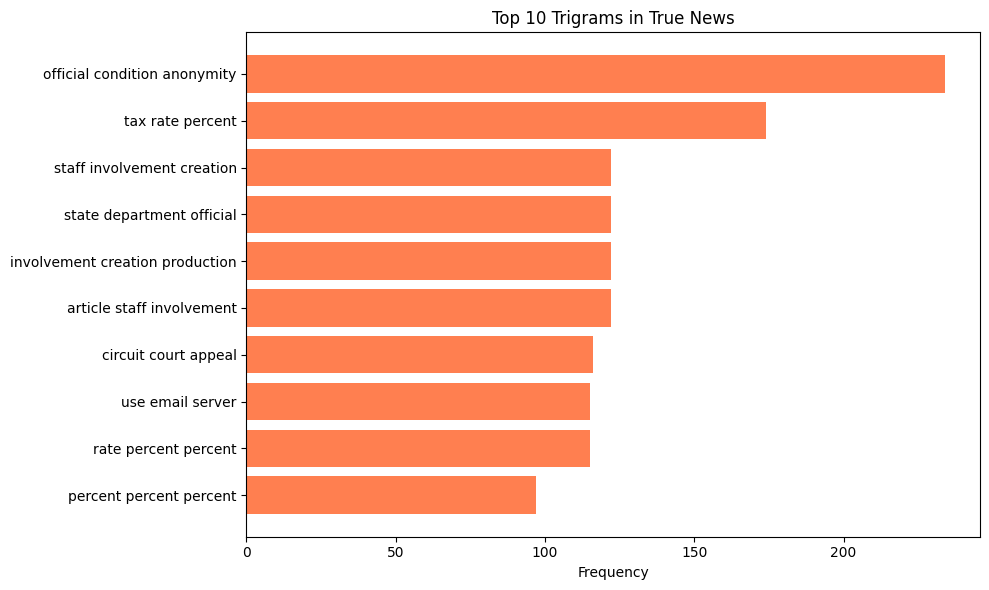

,n-gram,frequency
0,official condition anonymity,234
1,tax rate percent,174
2,staff involvement creation,122
3,state department official,122
4,involvement creation production,122
5,article staff involvement,122
6,circuit court appeal,116
7,use email server,115
8,rate percent percent,115
9,percent percent percent,97


In [86]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
plot_ngrams(true_news, (3,3), 10, "Top 10 Trigrams in True News", 'coral')

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

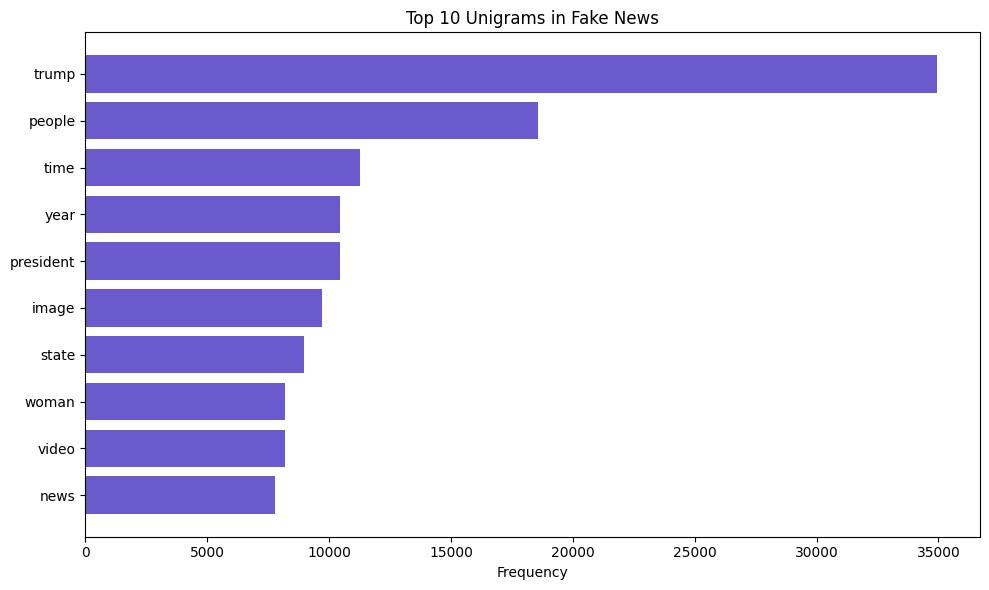

,n-gram,frequency
0,trump,34955
1,people,18572
2,time,11262
3,year,10453
4,president,10450
5,image,9704
6,state,8994
7,woman,8200
8,video,8194
9,news,7779


In [89]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
plot_ngrams(fake_news, (1,1), 10, "Top 10 Unigrams in Fake News", 'slateblue')

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



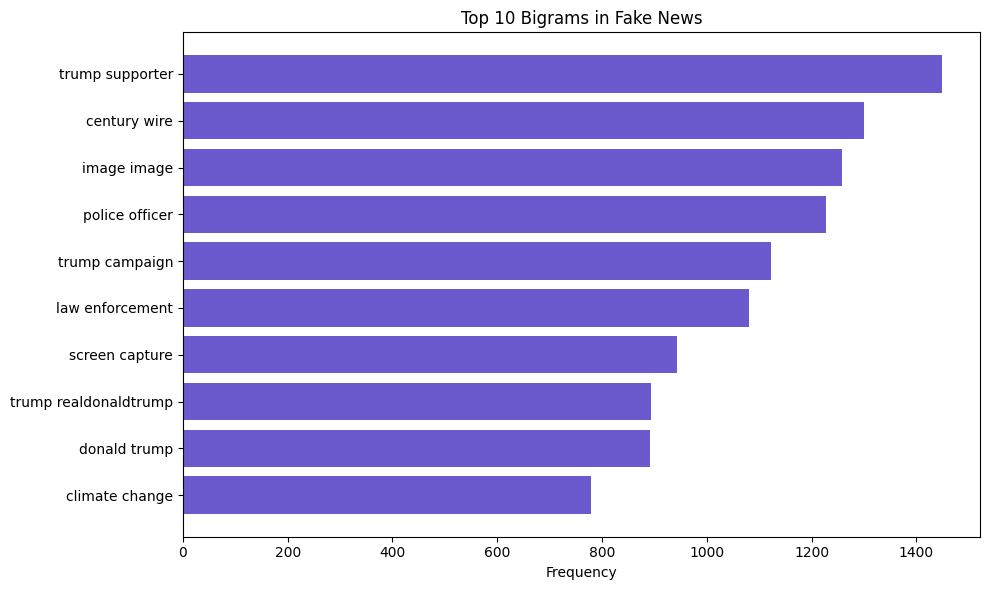

,n-gram,frequency
0,trump supporter,1449
1,century wire,1301
2,image image,1259
3,police officer,1227
4,trump campaign,1123
5,law enforcement,1081
6,screen capture,943
7,trump realdonaldtrump,894
8,donald trump,892
9,climate change,779


In [91]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
plot_ngrams(fake_news, (2,2), 10, "Top 10 Bigrams in Fake News", 'slateblue')

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



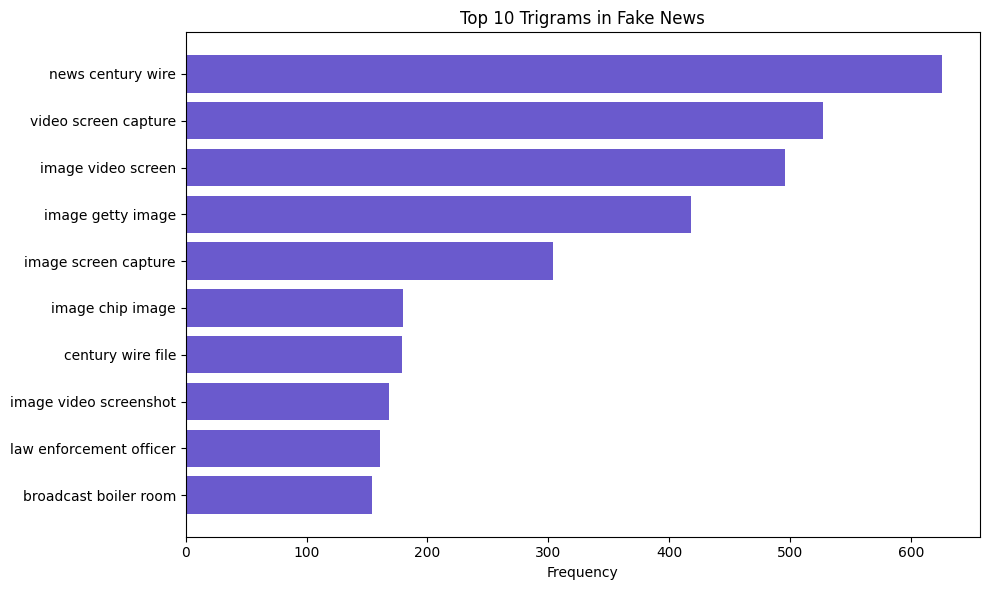

,n-gram,frequency
0,news century wire,626
1,video screen capture,527
2,image video screen,496
3,image getty image,418
4,image screen capture,304
5,image chip image,180
6,century wire file,179
7,image video screenshot,168
8,law enforcement officer,161
9,broadcast boiler room,154


In [93]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
plot_ngrams(fake_news, (3,3), 10, "Top 10 Trigrams in Fake News", 'slateblue')

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [97]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [99]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [102]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [104]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [107]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [109]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [112]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [114]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [116]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [119]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [121]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [123]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [126]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
import gensim.downloader as api
w2v_model = api.load('word2vec-google-news-300')

### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [128]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data

def ext_vector(tokens, model):
    vectores = [model[word] for word in tokens if word in model]
    if not vectores:
        return np.zeros(model.vector_size, dtype=float)
    return np.mean(vectores, axis=0)

X_train_vector = np.vstack(
    X_train.fillna('').apply(
        lambda x: ext_vector(x.split() if isinstance(x, str) else (list(x) if isinstance(x, (list, tuple)) else []), w2v_model)
    ).to_list()
)
X_val_vector = np.vstack(
    X_val.fillna('').apply(
        lambda x: ext_vector(x.split() if isinstance(x, str) else (list(x) if isinstance(x, (list, tuple)) else []), w2v_model)
    ).to_list()
)


In [129]:
## Extract the target variable for the training data and validation data
print("X_train_vec shape:", X_train_vector.shape)  
print("X_val_vec shape:",   X_val_vector.shape)     
print("y_train shape:",     y_train.shape)      
print("y_val shape:",       y_val.shape)  

X_train_vec shape: (31428, 300)
X_val_vec shape: (13470, 300)
y_train shape: (31428,)
y_val shape: (13470,)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [135]:
## Initialise Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
## Train Logistic Regression model on training data
logreg.fit(X_train_vector, y_train)
## Predict on validation data
y_pred_lr = logreg.predict(X_val_vector)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [137]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy  = accuracy_score(y_val, y_pred_lr)
precision = precision_score(y_val, y_pred_lr)
recall    = recall_score(y_val, y_pred_lr)
f1        = f1_score(y_val, y_pred_lr)

In [138]:
print(f"Accuracy is : {accuracy:.4f}")
print(f"Precision is: {precision:.4f}")
print(f"Recall is  : {recall:.4f}")
print(f"F1-Score is: {f1:.4f}")

Accuracy is : 0.8980
Precision is: 0.8921
Recall is  : 0.8943
F1-Score is: 0.8932


In [139]:
# Classification Report
print(classification_report(y_val, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7045
           1       0.89      0.89      0.89      6425

    accuracy                           0.90     13470
   macro avg       0.90      0.90      0.90     13470
weighted avg       0.90      0.90      0.90     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [142]:
## Initialise Decision Tree model
dec_tree = DecisionTreeClassifier(random_state=100)
## Train Decision Tree model on training data
dec_tree.fit(X_train_vector, y_train)
## Predict on validation data

y_pred_dt = dec_tree.predict(X_val_vector)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [144]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy  = accuracy_score(y_val, y_pred_dt)
precision = precision_score(y_val, y_pred_dt)
recall    = recall_score(y_val, y_pred_dt)
f1        = f1_score(y_val, y_pred_dt)

In [145]:
print(f"Accuracy is : {accuracy:.4f}")
print(f"Precision is: {precision:.4f}")
print(f"Recall is  : {recall:.4f}")
print(f"F1-Score is: {f1:.4f}")

Accuracy is : 0.8197
Precision is: 0.8246
Recall is  : 0.7900
F1-Score is: 0.8069


In [146]:
# Classification Report
print(classification_report(y_val, y_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      7045
           1       0.82      0.79      0.81      6425

    accuracy                           0.82     13470
   macro avg       0.82      0.82      0.82     13470
weighted avg       0.82      0.82      0.82     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [149]:
## Initialise Random Forest model
rand_forest = RandomForestClassifier(
    n_estimators=200,      
    max_depth=15,        
    random_state=100,
    n_jobs=-1              
)
## Train Rando
## Train Random Forest model on training data
rand_forest.fit(X_train_vector, y_train)
## Predict on validation data
y_pred_rf = rand_forest.predict(X_val_vector)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [151]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
accuracy  = accuracy_score(y_val, y_pred_rf)
precision = precision_score(y_val, y_pred_rf)
recall    = recall_score(y_val, y_pred_rf)
f1        = f1_score(y_val, y_pred_rf)

In [152]:
print(f"Accuracy is : {accuracy:.4f}")
print(f"Precision is: {precision:.4f}")
print(f"Recall id: {recall:.4f}")
print(f"F1-Score is: {f1:.4f}")

Accuracy is : 0.9018
Precision is: 0.9048
Recall id: 0.8875
F1-Score is: 0.8960


In [153]:
# Classification Report
print(classification_report(y_val, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      7045
           1       0.90      0.89      0.90      6425

    accuracy                           0.90     13470
   macro avg       0.90      0.90      0.90     13470
weighted avg       0.90      0.90      0.90     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

1. True news contain more formal language when compared to the fake news which is less coherent. 
2. We have used text cleaning, lemmatization, and part-of-speech filtering for semantic classification.
3. Among the three models, random forest performed the best overall followed by logistic regression.
4. Lemmatized text is relatively smaller compared to the original news text.
5. Words such as year, election, government, and trump etc are prominent which indicates that the news of this data is around election time.
6. F1 score provides a good balance between false positives and negatives and can be considered a good metric for minimising spread of wrong information.